# 1. History of Probability

The history of probability is tightly tied to the history of gambling, the earliest six-sided dice dated to about 3000 BC. The first playing cards were known to have existed in the 9th century. However, during most of humanity there was not a formal definition of the mathematics  of chance. 

One problem was the abstract concept of randomness. For most of the history of humanity, randomness was mostly attributed to divine intervention thus not really tried to be treated as a mathematical concept. Another problem was the inconvenience of the earlier numerical systems. It was not until the adoption of the indian-arabic numerals that real advances were made regarding the concept and rules of gambling.

It was not until the 17th century that a more formal definition of probability and chance was developed. The intial records of the attempts to solve gambling problems are found in a series of correspondences between two mathematicians Blaise Pascal and Pierre de Fermat.

In these letters they attempt to solve questions related to gambling that were raised by a French nobleman (Antoine Gombaud, Chevalier de Mere) whom was an avid gambler.

### Lets review one of the questions that Chevalier the Mere asked to Pascal:

For the first question, de Mere made bet with even odds on getting at least one six on four rolls of a fair die. He was actually making money from this bet, why? 

We shall try to see if de Mere is correct by simulating his various bets

#### How can we generate random draws in R?

In [3]:
##Generate a random number from 0 to 1 using the uniform distribution
## We will use the function runif()
?runif

In [2]:
runif(20, 0,1)

[1] 0.10581543 0.44384635 0.79058137 0.82270327 0.27656973 0.05989187
 [7] 0.46323777 0.95373439 0.32858276 0.02550679 0.32345398 0.72665027
[13] 0.65091468 0.25778831 0.80109623 0.51116673 0.45224529 0.67708909
[19] 0.22616827 0.37827686

In [22]:
## Antoher was to generate a random draw is with the function sample() 
?sample

In [21]:
##Randomly sample 1 object from the numerical range 1 to 6 
sample(1:6,1)

[1] 6

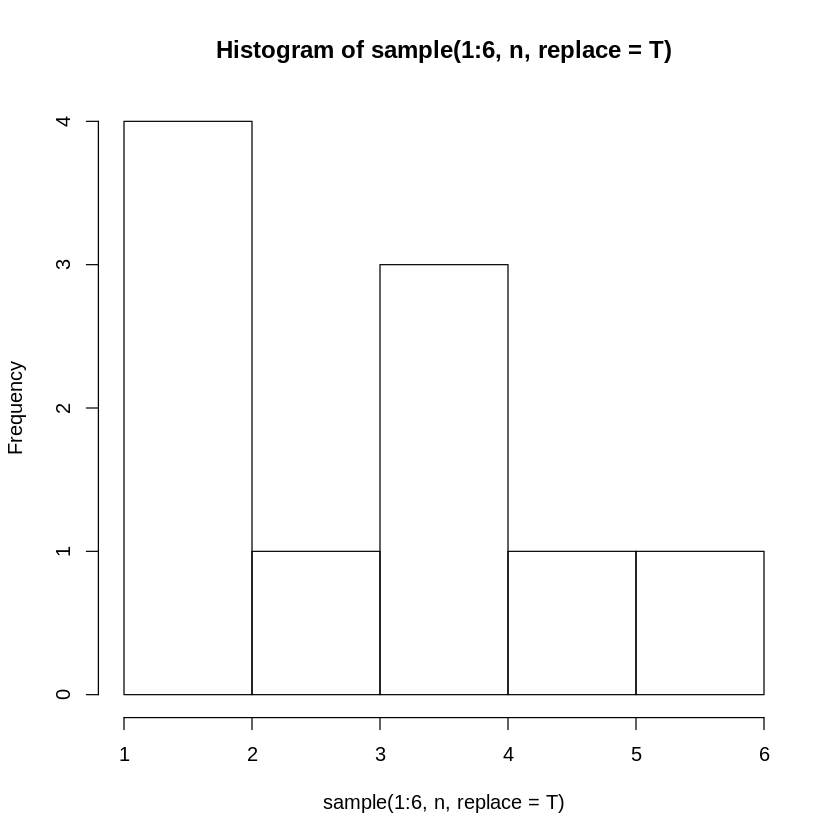

In [8]:
##The function hist() creates a histogram of the proportions of values obtained in n random draws
n = 10
hist(sample(1:6, n, replace = T))

What happens to our proportions when we increase n to a larger number (100,10000,100000)

We can also sample any type of vector, for example

In [9]:
sample(state.name, 10)


[1] "Virginia"   "Iowa"       "Florida"    "Idaho"      "Nevada"    
 [6] "Illinois"   "Kentucky"   "Arizona"    "Georgia"    "New Mexico"

In [10]:
sample(LETTERS,30, replace = T)

[1] "B" "Z" "Y" "K" "G" "A" "S" "O" "M" "D" "P" "W" "B" "K" "S" "B" "J" "Z" "Z"
[20] "K" "N" "I" "O" "H" "N" "Z" "F" "T" "M" "K"

Lets simulate a simple gambling game coin toss

In [11]:
coins = c(0,1)

In [12]:
names(coins) = c("H","T")

In [13]:
n = 10000
trial = sample(coins, n, replace = T)
#trial

In [14]:
length(trial[trial==0])/n
length(trial[trial==1])/n

[1] 0.4929

[1] 0.5071

In [15]:
length(trial[names(trial)=="T"])/n
length(trial[names(trial)=="H"])/n

[1] 0.5071

[1] 0.4929

In [16]:
table(trial)

trial
   0    1 
4929 5071 

## Back to our original question, we need to simulate 4 trows of a fare die and count how many 6 we get

In [17]:
#We need to create a function that allows us to sample many times (in this case 4) from a die
die = c(1:6)
n = 4

A function in R is created using the format
Var_name = function(args){...}

In [18]:
##This function will sample from the vector x, n times with replacement
chevalier = function(x,n){
  a = sample(x,n,replace = T)
  return(a)
}

In [39]:
res = chevalier(die,n)
res
is.element(c('6','6'),res)

[1] 3 5 4 5

[1] FALSE FALSE

We need now to repeat this draw many times and calculate how many times we are succesful (at least one 6) or not. In python the clear method is with a loop.

In R loops (for, if, while) follow the following format

for (i in x){...}


In [32]:
m = 10 #how many times we are going to repeat the draw

#we need a loop that cycles m times using our sampling function, 
#and assing each result to either a true or false if we have a 6 in the draw

a = character(m) #create an empty vector of m number of characters
mul = list() #create an empty list to get all our results
res = vector()
#a 
for (i in 1:m){
  mul <- chevalier(a,n)
  
  if (is.element('6',mul)){
      res <- c(res,TRUE) 
  }
  else{
      res <-c(res,FALSE)
  }
}

In [33]:
res


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [28]:
a

[1] "" "" "" "" "" "" "" "" "" ""

In [29]:
table(a)["TRUE"]/m

<NA> 
  NA

we hate loops in R, loops in R run extremely slow. A very important family of built in functions serve as a more efficient way of deal with loops.

This is the apply family

Lets rewrite our preview example using the apply function



In [42]:
?apply

In [43]:
#First lets replicate the sampling function m times
m = 10
die_list = replicate(m,chevalier(die,n))
die_list

1,3,6,3,2,4,5,1,5,3
3,3,4,5,6,4,3,2,1,3
3,6,1,2,6,6,3,4,5,4
5,6,3,4,1,3,5,1,2,1


In [45]:
true_vector = apply(die_list, 2, function(r) any(6 %in% r))
true_vector

[1] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE

In [51]:
length(which(true_vector == "TRUE"))/length(true_vector)

[1] 0.2

In [49]:
true_vector = apply(die_list, 2, function(r) r[1] == "3" & r[2] == 3 )
true_vector

[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

In [52]:
length(true_vector)

[1] 10